In [65]:
import collections, time
start = time.perf_counter()

In [66]:
text = "Learn, How to write your own function; To' count. the number of times a unique word appears in a given string text"


def count_words(text):
    text = text.lower()
    skips = [",", ".", "'", '"', ";", ":", "(", ")", "`"]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts


def count_words_fast(text):
    text = text.lower()
    skips = [",", ".", "'", '"', ";", ":", "(", ")", "`"]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = collections.Counter(text.split(" "))
    return word_counts


n = count_words_fast(text)
print(len(n.values()))

20


In [67]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [68]:
count_words(text) == count_words_fast(text)

True

In [69]:
def read_book(title_path):
    with open(title_path, "r", encoding="utf8") as current_book:
        text = current_book.read()
    text = text.replace("\n", "").replace("\r", "")
    return text

book = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")

In [70]:
ind = book.find("What's in a name?")
book[ind: ind+1000]

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [71]:
def word_stats(word_counts):
    num_unique_words = len(word_counts)
    count = word_counts.values()
    return (num_unique_words, count)

book1 = read_book("Books/English/shakespeare/Romeo and Juliet.txt")
(num_unique_words, count) = word_stats(count_words_fast(book1))
print(f"Title: Romeo and Juliet\n\nEnglish\nNo. of unique words: {num_unique_words}\nTotal Words: {sum(count)}")
book2 = read_book("./Books/German/shakespeare/Romeo und Julia.txt")
(num_unique_words, count) = word_stats(count_words_fast(book2))
print(f"\nGerman\nNo. of unique words: {num_unique_words}\nTotal Words: {sum(count)}")

Title: Romeo and Juliet

English
No. of unique words: 5083
Total Words: 40776

German
No. of unique words: 7485
Total Words: 20311


In [72]:
# Read all the books
import pandas as pd
import os

books = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))
row = 1
book_dir = "./Books/"
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            input_file = book_dir + "/" + language + "/" + author + "/" + title
            # print(title.replace(".txt", ""))
            text = read_book(input_file)
            (num_unique_words, count) = word_stats(count_words_fast(text))
            books.loc[row] = language, author.capitalize(), title.replace(".txt", ""), sum(count), num_unique_words
            row += 1
            
books.head()

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5428


In [73]:
books.tail()

,language,author,title,length,unique
98,Portuguese,Queir¢s,O crime do padre Amaro,128630,29199
99,Portuguese,Queir¢s,O Mandarim,21440,7812
100,Portuguese,Queir¢s,O Primo Bazilio,107303,27613
101,Portuguese,Queir¢s,Os Maias,195771,40574
102,Portuguese,Shakespeare,Hamlet,30567,9607


In [74]:
# Book stats analysis
books.describe()

,language,author,title,length,unique
count,102,102,102,102,102
unique,4,11,97,102,102
top,German,Branco,Hamlet,85756,13823
freq,34,16,3,1,1


In [75]:
books[books.language == "English"]

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5428
6,English,Shakespeare,Romeo and Juliet,40776,5083
7,English,Shakespeare,The Merchant of Venice,20949,4978


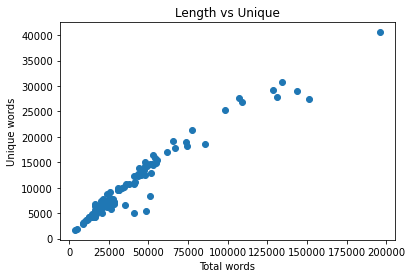

In [76]:
import matplotlib.pyplot as plt

plt.plot(books.length, books.unique, "o");
plt.xlabel("Total words")
plt.ylabel("Unique words")
plt.title("Length vs Unique")
plt.savefig("./figures/len_unique.pdf")

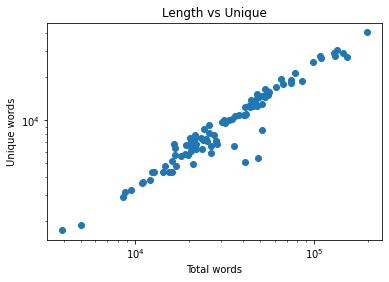

In [77]:
plt.loglog(books.length, books.unique, "o");
plt.xlabel("Total words")
plt.ylabel("Unique words")
plt.title("Length vs Unique")
plt.savefig("./figures/len_unique_loglog.pdf")

In [78]:
# Get the unique values from a column
books.language.unique()

array(['English', 'French', 'German', 'Portuguese'], dtype=object)

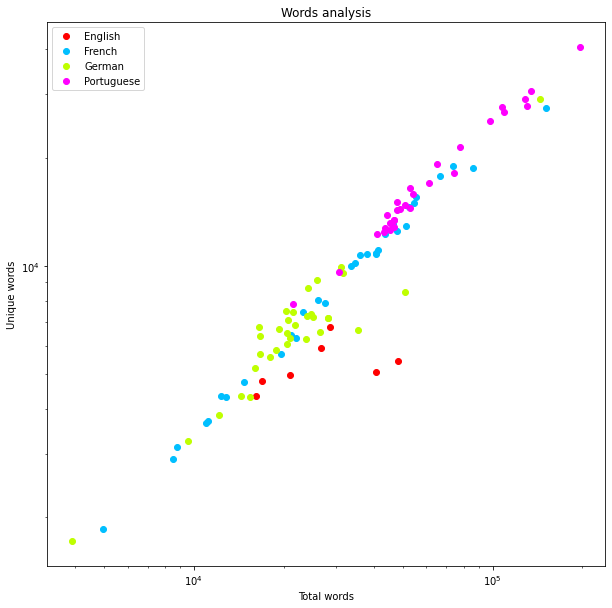

In [79]:
plt.figure(figsize=(10,10))
plt.xlabel("Total words")
plt.ylabel("Unique words")
plt.title("Words analysis")
languages = books.language.unique()
colors = ["#ff0000", "#00bfff", "#bfff00", "#ff00ff"]
for i in range(len(languages)):
    subset = books[books.language == languages[i]]
    plt.loglog(subset.length, subset.unique, "o",label = languages[i] , color = colors[i])
plt.legend()
plt.savefig("./figures/lang_analysis.pdf")

In [80]:
end = time.perf_counter()
print(end - start)

3.241488599999684
